## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
numberofmice = len(merge_df['Mouse ID'])
print("There Are " + str(numberofmice) + " Mice")
numberofumice = merge_df['Mouse ID'].nunique()
print("There Are " + str(numberofumice) + " Unique Mice")

There Are 1893 Mice
There Are 249 Unique Mice


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# QUESTION FOR ERIN/WILL --> WHAT ARE THEY LOOKING FOR HERE??  

# the below returns all the duplicate Mouse ID's
duplicated_values = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
# duplicated_values = merge_df[merge_df.duplicated(subset=['Mouse ID'])]
duplicated_values

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = merge_df.loc[merge_df['Mouse ID'] == 'g989']
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# First tried this way, but it did not drop ALL the g989 values.  It kept one so total count was 249.
# clean_df = merge_df.drop_duplicates(subset=['Mouse ID'])

# mouseid = merge_df['Mouse ID']
clean_df = merge_df[merge_df['Mouse ID'] != 'g989']

clean_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)

1880

In [8]:
#If want to reset index

#new_index_df = clean_df.reset_index(drop=True)
#new_index_df.head()

## Summary Statistics

In [9]:
# mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
# mean

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

groupbydrug = clean_df.groupby(clean_df["Drug Regimen"])

tumormean = round(groupbydrug["Tumor Volume (mm3)"].mean(), 6)
tumormedian = round(groupbydrug["Tumor Volume (mm3)"].median(), 6)
tumorvar = round(groupbydrug["Tumor Volume (mm3)"].var(), 6)
tumorstd = round(groupbydrug["Tumor Volume (mm3)"].std(), 6)
tumorsem = round(groupbydrug["Tumor Volume (mm3)"].sem(), 6)

In [22]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_dict = [{"Mean Tumor Volume": tumormean, "Median Tumor Volume": tumormedian}]
drug_stats = pd.DataFrame({'Mean Tumor Volume': tumormean,
                              'Median Tumor Volume': tumormedian,
                              'Tumor Volume Variance': tumorvar,
                              'Tumor Volume Std. Dev.': tumorstd,
                            'Tumor Volume Std. Err.': tumorsem
                          })

drug_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_stats2 = groupbydrug.agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem' ]})
drug_stats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [40]:
# x_axis = clean_df["Drug Regimen"].unique()

## Bar and Pie Charts

In [76]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


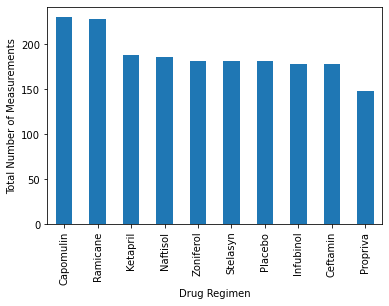

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [79]:
miceperdrug = groupbydrug["Mouse ID"].count()
miceperdrug = miceperdrug.sort_values(ascending=False)


# Create a bar chart based off of the group series from before
miceperdrug_chart = miceperdrug.plot(kind='bar')

# Set the xlabel and ylabel using class methods
miceperdrug_chart.set_xlabel("Drug Regimen")
miceperdrug_chart.set_ylabel("Total Number of Measurements")

plt.show()
plt.tight_layout()

# # Lesson 1 - Activity 7
# # # Create an array that contains the number of users each language has
# x_axis = np.arange(len(miceperdrug))

# # # Tell matplotlib that we will be making a bar chart
# # # Users is our y axis and x_axis is, of course, our x axis
# # # We apply align="edge" to ensure our bars line up with our tick marks
# plt.bar(x_axis, miceperdrug, color='blue', alpha=0.5, align="center")

# # # Tell matplotlib where we would like to place each of our x axis headers
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, groupbydrug.index())

# # # Sets the x limits of the current chart
# plt.xlim(-0.75, len(x_axis)-0.25)
# # # Sets the y limits of the current chart
# plt.ylim(0, max(miceperdrug)+10)


# # #OR - from Lesson 2 - Activity 2
# # # plt.ylim(0, max(rain_df["Inches"])+10)

# # # Give our chart some labels and a tile
# # plt.title("Title")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Total Number of Measurements")

# # #Lesson 2 - Activity 2
# # # Use DataFrame.plot() in order to create a bar chart of the data
# # state_and_inches.plot(kind="bar", figsize=(20,3))

# # Set a title for the chart
# plt.title("Average Rain Per State")

# plt.show()
# plt.tight_layout()

# # Pandas can also plot multiple columns if the DataFrame includes them
# multi_plot = rain_df.plot(kind="bar", figsize=(20,5))

# # PandasPlot.set_xticklabels() can be used to set the tick labels as well
# multi_plot.set_xticklabels(rain_df["State"], rotation=45)

plt.show()
plt.tight_layout()

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
#JD NOTE - REFERENCE DAY 3 FOR BELOW

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

#JD NOTE - REFERENCE LESSON 2 FOR FOR LOOP, ACTIVITY 2 - PANDAS PLOT (AVG STATE RAIN).  SEE BELOW CODE SNIPPET

#--------------
# # Set x axis and tick locations
# x_axis = np.arange(len(rain_df))
# tick_locations = [value for value in x_axis]

#---------------

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# REFERENCE DAY 3
